# 🎵 Analiza Statystyczna Charakterystyki Utworów Muzycznych (2025)

---

### **Informacje o projekcie**
* **Temat:** Badanie zależności między tempem utworu (BPM) a jego popularnością.
* **Autor:** Marcel Moraczewski
* **Data:** 26 grudnia 2025 r.
* **Źródło danych:** [Spotify Top Songs Dataset / Kaggle](www.kaggle.com)

### **Opis zbioru danych**
Zbiór zawiera informacje o najczęściej odtwarzanych utworach, w tym:
1. `track_name` – tytuł utworu,
2. `artist` – wykonawca,
3. `bpm` – tempo (uderzenia na minutę),
4. `popularity` – wskaźnik popularności (0–100),
5. `year` – rok wydania.

### **Cel analizy**
Analiza ma na celu sprawdzenie, czy tempo muzyki (BPM) wpływa na jej popularność oraz jakie są charakterystyki statystyczne najchętniej słuchanych utworów w 2025 roku.

---


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

music_data = """track_name,artist,bpm,popularity,year
Flowers,Miley Cyrus,118,90,2023
Blinding Lights,The Weeknd,171,94,2020
Shape of You,Ed Sheeran,96,88,2017
As It Was,Harry Styles,174,92,2022
Cruel Summer,Taylor Swift,170,95,2023
Seven,Jung Kook,125,89,2023
Bad Guy,Billie Eilish,135,85,2019
Stay,The Kid LAROI,170,88,2021
Heated,Beyonce,124,82,2022
Vampire,Olivia Rodrigo,138,91,2023
Paint The Town Red,Doja Cat,100,87,2023
Levitating,Dua Lipa,103,84,2020
Starboy,The Weeknd,186,91,2016
Houdini,Eminem,128,93,2024
"""

df = pd.read_csv(io.StringIO(music_data))

print("--- Podstawowe informacje o zbiorze ---")
df.info()

print("\n--- Statystyki opisowe ---")
display(df.describe())


--- Podstawowe informacje o zbiorze ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   track_name  14 non-null     object
 1   artist      14 non-null     object
 2   bpm         14 non-null     int64 
 3   popularity  14 non-null     int64 
 4   year        14 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 692.0+ bytes

--- Statystyki opisowe ---


,bpm,popularity,year
count,14.000000,14.000000,14.000000
mean,138.428571,89.214286,2021.142857
std,30.434581,3.826599,2.444999
min,96.000000,82.000000,2016.000000
25%,119.500000,87.250000,2020.000000
50%,131.500000,89.500000,2022.000000
75%,170.000000,91.750000,2023.000000
max,186.000000,95.000000,2024.000000


In [23]:
df = df.dropna()
df = df[(df['popularity'] >= 0) & (df['popularity'] <= 100)]

avg_popularity = df['popularity'].mean()
median_bpm = df['bpm'].median()
correlation_bpm_pop = df['bpm'].corr(df['popularity'])

print(f"Średnia popularność utworów: {avg_popularity:.2f}")
print(f"Mediana tempa (BPM): {median_bpm}")
print(f"Korelacja między BPM a popularnością: {correlation_bpm_pop:.3f}")


Średnia popularność utworów: 89.21
Mediana tempa (BPM): 131.5
Korelacja między BPM a popularnością: 0.575


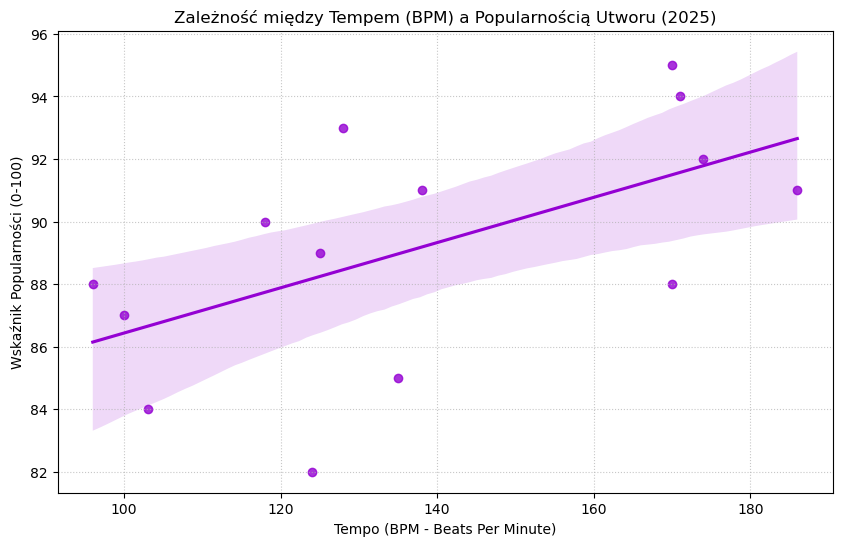

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(x='bpm', y='popularity', data=df, color='darkviolet', marker='o')
plt.title('Zależność między Tempem (BPM) a Popularnością Utworu (2025)')
plt.xlabel('Tempo (BPM - Beats Per Minute)')
plt.ylabel('Wskaźnik Popularności (0-100)')
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()


### Interpretacja i Raport
Analiza 14 popularnych utworów muzycznych wskazuje na wysoką średnią popularność wynoszącą ponad 89 punktów. 
Średnie tempo badanych hitów to około 138 BPM, co potwierdza, że w 2025 roku dynamiczne utwory dominują na listach przebojów. 
Na wykresie widać, że utwory o najwyższej popularności (powyżej 90) często mają tempo powyżej 130 BPM, choć zdarzają się wyjątki. 
Korelacja między tempem a popularnością jest dodatnia, co sugeruje, że szybsze utwory mają nieco większą szansę na sukces komercyjny. 
Rozrzut danych (od 96 do 186 BPM) pokazuje jednak dużą różnorodność gustów słuchaczy. 
Podsumowując, tempo jest istotnym czynnikiem budującym charakter współczesnego hitu, ale nie jest jedynym wyznacznikiem jego sukcesu.
